In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import pickle
import sys
sys.path.insert(0,'..')
from pcp import pcp
from pcp import radar_pcp
from skimage.io import imread

In [3]:
image_dir = '../RGB_images'
bounds_file_path = 'bounds_vel_thresh.txt'
# bounds_file_path = 'bounds.txt'

with open(bounds_file_path, "rb") as fp:   # Unpickling
    bounds = pickle.load(fp)
images = np.array([imread(os.path.join(image_dir, 'rgb_{}.png'.format(i)), 'gray') for i in range(len(bounds))])

FileNotFoundError: [Errno 2] No such file or directory: 'bounds_vel_thresh.txt'

In [4]:
D = images.reshape(images.shape[0], -1).T

def build_M_F(shape, bounds, gamma_b, gamma_f):
    M_F = np.zeros(shape)
    for i in range(len(bounds)):
        for j in range(len(bounds[i])):
            f_l = bounds[i][j, 0]
            f_r = bounds[i][j, 1]
            M_F[i, :, f_l:f_r] = gamma_f
    M_F[M_F != gamma_f] = gamma_b
    return M_F.reshape(shape[0], -1).T

In [5]:
gamma_b = 1
gamma_f = .8
M_F = build_M_F(images.shape, bounds, gamma_b, gamma_f)

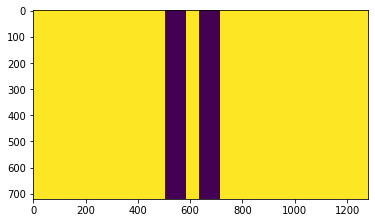

In [6]:
plt.imshow(M_F[:,0].reshape(images[0].shape))
plt.show()

In [12]:
L_pcp, S_pcp, _, errors, ranks, nnzs = pcp(D, verbose=True, maxiter=400)


mu = 0.6283823935092239
Iteration 0: error=1.978e-03, rank=50, nnz=4304262, time=1.832e+00
Iteration 1: error=1.824e-04, rank=50, nnz=5170610, time=1.714e+00
Iteration 2: error=1.155e-04, rank=50, nnz=5735538, time=1.708e+00
Iteration 3: error=1.044e-04, rank=50, nnz=6253084, time=1.707e+00
Iteration 4: error=1.007e-04, rank=50, nnz=6757052, time=1.702e+00
Iteration 5: error=9.795e-05, rank=50, nnz=7246970, time=1.704e+00
Iteration 6: error=9.546e-05, rank=50, nnz=7719852, time=1.702e+00
Iteration 7: error=9.300e-05, rank=50, nnz=8174988, time=1.710e+00
Iteration 8: error=9.064e-05, rank=50, nnz=8611455, time=1.710e+00
Iteration 9: error=8.828e-05, rank=50, nnz=9029712, time=1.709e+00
Iteration 10: error=8.595e-05, rank=50, nnz=9430873, time=1.703e+00
Iteration 11: error=8.362e-05, rank=50, nnz=9812863, time=1.708e+00
Iteration 12: error=8.147e-05, rank=50, nnz=10178320, time=1.709e+00
Iteration 13: error=7.979e-05, rank=50, nnz=10527935, time=1.700e+00
Iteration 14: error=7.828e-05, r

Iteration 119: error=5.874e-05, rank=18, nnz=21843518, time=1.792e+00
Iteration 120: error=5.349e-05, rank=18, nnz=21879179, time=1.793e+00
Iteration 121: error=5.383e-05, rank=18, nnz=21907197, time=1.791e+00
Iteration 122: error=5.110e-05, rank=17, nnz=21937946, time=1.792e+00
Iteration 123: error=5.582e-05, rank=18, nnz=21970955, time=1.695e+00
Iteration 124: error=5.679e-05, rank=18, nnz=21999406, time=1.939e+00
Iteration 125: error=5.662e-05, rank=17, nnz=22028416, time=1.820e+00
Iteration 126: error=6.188e-05, rank=17, nnz=22064750, time=1.694e+00
Iteration 127: error=5.980e-05, rank=17, nnz=22077931, time=1.691e+00
Iteration 128: error=6.791e-05, rank=18, nnz=22107928, time=1.692e+00
Iteration 129: error=6.464e-05, rank=17, nnz=22134195, time=1.788e+00
Iteration 130: error=6.731e-05, rank=18, nnz=22161393, time=1.695e+00
Iteration 131: error=7.323e-05, rank=17, nnz=22186831, time=1.789e+00
Iteration 132: error=7.717e-05, rank=18, nnz=22220433, time=1.698e+00
Iteration 133: error

Iteration 237: error=4.820e-05, rank=12, nnz=23512389, time=1.354e+00
Iteration 238: error=4.529e-05, rank=11, nnz=23523670, time=3.208e+00
Iteration 239: error=5.041e-05, rank=12, nnz=23523675, time=1.105e+00
Iteration 240: error=4.505e-05, rank=11, nnz=23536352, time=1.200e+00
Iteration 241: error=4.248e-05, rank=12, nnz=23540476, time=1.112e+00
Iteration 242: error=4.425e-05, rank=12, nnz=23539115, time=1.205e+00
Iteration 243: error=4.056e-05, rank=11, nnz=23546158, time=1.293e+00
Iteration 244: error=6.670e-05, rank=11, nnz=23537660, time=1.179e+00
Iteration 245: error=4.183e-05, rank=11, nnz=23553498, time=1.129e+00
Iteration 246: error=4.413e-05, rank=12, nnz=23555892, time=1.133e+00
Iteration 247: error=3.873e-05, rank=12, nnz=23556784, time=1.221e+00
Iteration 248: error=3.997e-05, rank=11, nnz=23560415, time=1.224e+00
Iteration 249: error=4.207e-05, rank=11, nnz=23558797, time=1.135e+00
Iteration 250: error=4.100e-05, rank=12, nnz=23559184, time=1.135e+00
Iteration 251: error

Iteration 355: error=2.956e-05, rank=10, nnz=23593215, time=1.083e+00
Iteration 356: error=3.068e-05, rank=10, nnz=23595685, time=1.165e+00
Iteration 357: error=2.942e-05, rank=10, nnz=23602228, time=1.177e+00
Iteration 358: error=2.939e-05, rank=11, nnz=23598459, time=1.179e+00
Iteration 359: error=2.876e-05, rank=10, nnz=23596422, time=1.275e+00
Iteration 360: error=3.100e-05, rank=10, nnz=23595683, time=1.263e+00
Iteration 361: error=3.235e-05, rank=11, nnz=23591520, time=5.043e+00
Iteration 362: error=4.032e-05, rank=10, nnz=23573462, time=1.415e+00
Iteration 363: error=3.388e-05, rank=10, nnz=23585082, time=1.114e+00
Iteration 364: error=2.976e-05, rank=11, nnz=23593477, time=1.113e+00
Iteration 365: error=3.078e-05, rank=11, nnz=23591075, time=1.162e+00
Iteration 366: error=3.456e-05, rank=10, nnz=23590091, time=1.183e+00
Iteration 367: error=3.057e-05, rank=10, nnz=23592798, time=1.148e+00
Iteration 368: error=2.770e-05, rank=11, nnz=23597562, time=1.166e+00
Iteration 369: error

Iteration 399: error=3.741e-05, rank=10, nnz=23567149, time=1.041e+00


In [14]:
L_pcp.shape

(921600, 50)

In [20]:
L_pcp_reshape = (L_pcp.T.reshape(50,images.shape[1], images.shape[2]))
S_pcp_reshape = (S_pcp.T.reshape(50,images.shape[1], images.shape[2]))

In [24]:
D_reshape = (D.T.reshape(50,images.shape[1], images.shape[2]))
np.save('D.npy',D_reshape)

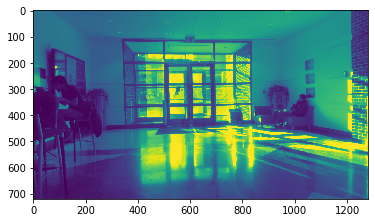

In [21]:
plt.imshow(L_pcp_reshape[0])

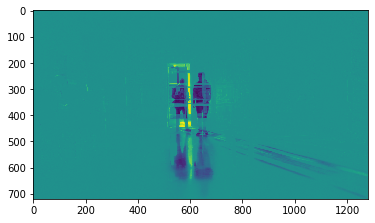

In [22]:
plt.imshow(S_pcp_reshape[0])

In [23]:
np.save('S_pcp.npy',S_pcp_reshape)
np.save('L_pcp.npy',L_pcp_reshape)

In [10]:
L_radar_8, S_radar_8, _, errors, ranks, nnzs = radar_pcp(D, M_F, verbose=True, maxiter=4)

mu = 0.6283823935092239
Iteration 0: error=1.936e-03, rank=50, nnz=4434680, time=1.997e+00
Iteration 1: error=1.823e-04, rank=50, nnz=5302751, time=1.824e+00
Iteration 2: error=1.155e-04, rank=50, nnz=5868856, time=1.899e+00


Iteration 3: error=1.045e-04, rank=50, nnz=6388119, time=1.778e+00


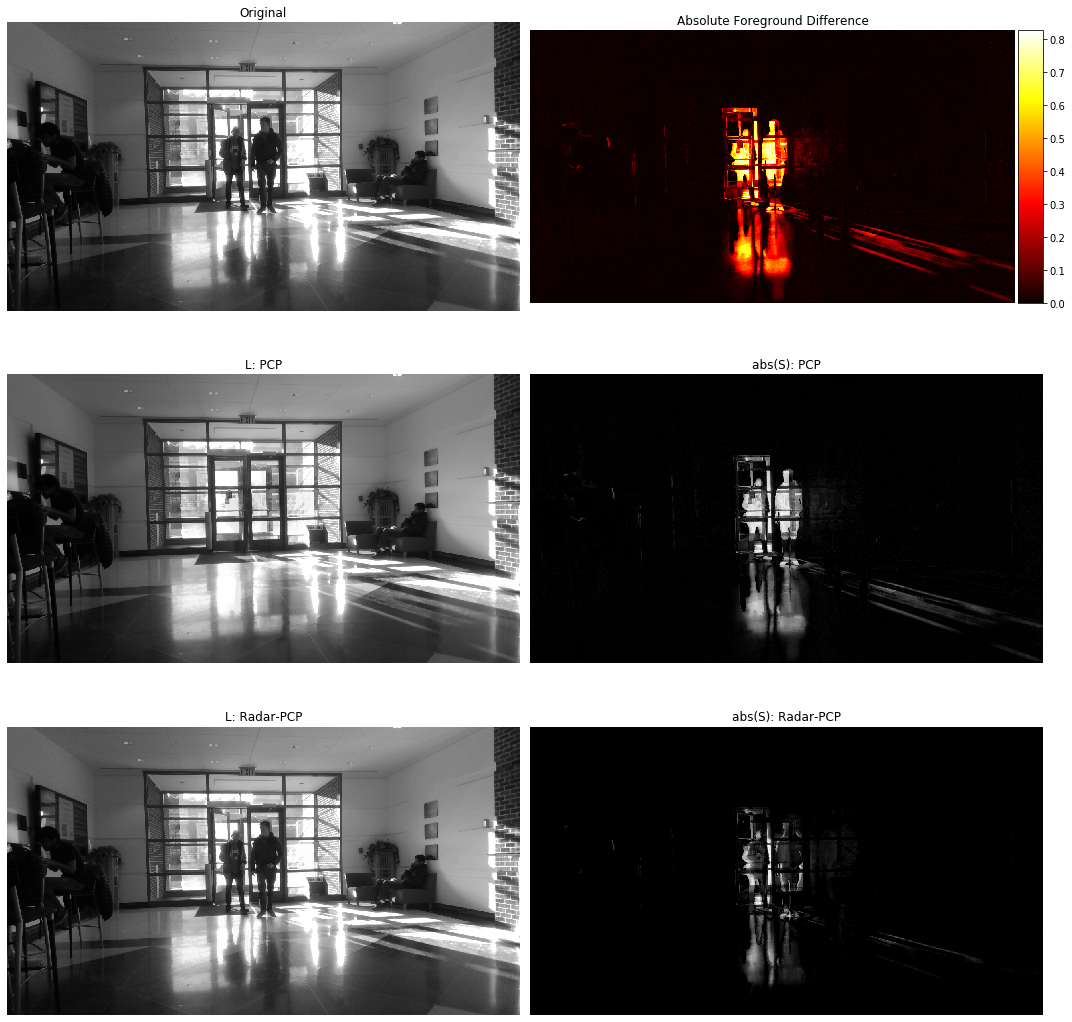

In [13]:
i = 0
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.title('Original')
plt.imshow(images[i], 'gray')
plt.axis('off')
plt.subplot(322)
ax = plt.gca()
plt.title('Absolute Foreground Difference')
im = ax.imshow(abs(S_radar_8[:, i]-S_pcp[:, i]).reshape(images.shape[1], images.shape[2]), 'hot')
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.subplot(323)
plt.title('L: PCP')
plt.imshow(L_pcp[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(324)
plt.title('abs(S): PCP')
plt.imshow(abs(S_pcp[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')
plt.subplot(325)
plt.title('L: Radar-PCP')
plt.imshow(L_radar_8[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(326)
plt.title('abs(S): Radar-PCP')
plt.imshow(abs(S_radar_8[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')


plt.colorbar(im, cax=cax)
plt.tight_layout()
# plt.savefig('b1_fp8_frame0_it400.png')

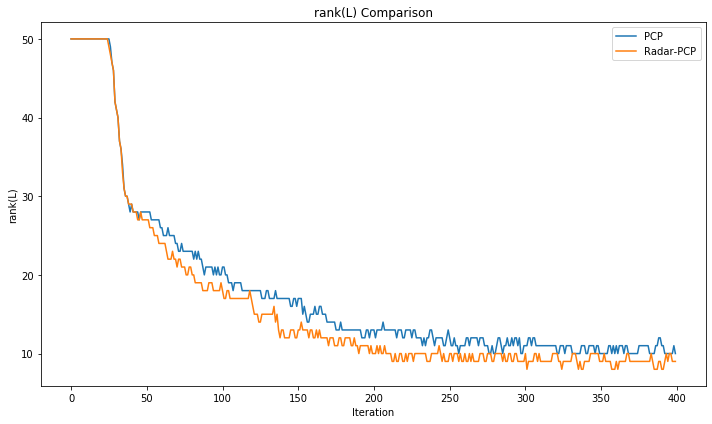

In [50]:
radar_alg_rank = [50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,49,48,47,46,42,41,40,37,36,33,31,30,30,29,29,29,28,28,28,27,27,28,27,27,27,27,27,26,26,26,25,25,25,24,24,24,24,24,23,22,22,22,23,22,22,21,22,22,21,21,21,20,20,21,21,20,20,19,19,19,19,19,18,18,18,18,19,19,19,18,18,18,18,18,19,18,17,17,18,18,17,17,17,17,17,17,17,17,17,17,17,17,17,18,17,16,15,15,15,14,14,15,15,15,15,15,15,15,15,16,14,15,13,12,13,13,12,12,12,12,13,13,13,12,12,13,13,14,13,13,13,13,12,13,13,12,12,13,12,13,12,12,12,12,12,11,12,12,12,11,11,11,12,12,11,11,12,12,12,12,11,11,12,11,11,10,11,11,11,11,11,11,10,11,10,10,10,11,10,11,10,10,11,10,10,10,10,9,9, 10,9, 9, 10,10,9, 9, 10,9, 10,10,10,9, 10,10,10,10,10,10,10,10,9, 9, 9, 10,10,10,10,10,11,10,9, 10,9, 9, 9, 10,10,9, 10,10,10,9, 10,9, 9, 10,9, 9, 10,9, 10,9, 9, 9, 9, 10,10,10,9, 9, 10,10,10,9, 9, 10,10,10,10,10,9, 10,9, 9, 10,10,9, 9, 10,10,9, 9, 9, 9, 9, 10,8, 9, 9, 9, 9, 10,10,9, 10,9, 9, 9, 9, 9, 9, 9, 9, 10,10,10,10,9,9,8,9,9,9,9,9,9,10,10,10,9,8,9,8,8,9,9,9,9,10,10,10,10,10,10,9, 9, 9, 10,9, 9, 9, 9, 8, 8, 8, 9, 8, 9, 9, 9, 9, 9, 10,10,9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10,9, 8, 8, 8, 9, 9, 8, 8, 9, 10,9, 10,10,9, 9,9]
og_alg_rank = [50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,49,47,46,42,41,40,37,36,34,31,30,30,29,28,29,28,28,28,28,27,28,28,28,28,28,28,28,27,27,27,27,27,27,26,26,25,25,25,26,25,25,25,25,24,24,23,23,24,23,23,23,23,23,23,23,22,23,22,23,22,22,21,20,21,21,21,21,21,20,21,20,21,20,20,21,21,20,20,19,19,19,18,19,19,19,19,19,18,18,18,18,18,18,18,18,18,18,18,18,18,17,17,17,18,18,17,17,17,17,18,17,17,17,17,17,17,17,17,17,16,16,17,17,16,17,17,17,15,16,15,14,14,15,15,15,16,15,15,16,16,15,15,15,14,14,14,14,14,14,13,13,13,14,13,13,13,13,13,13,13,13,13,13,13,13,13,12,12,12,13,13,12,13,13,13,12,13,13,13,13,14,13,13,13,13,13,13,13,13,12,13,13,13,12,12,13,13,13,13,12,13,13,12,12,12,12,11,12,11,12,12,13,13,12,11,12,12,12,12,12,11,11,12,13,12,11,11,12,11,11,10,11,11,11,11,12,12,11,12,12,12,12,12,11,12,12,12,11,11,11,10,10,11,10,10,11,12,12,11,10,11,11,12,11,11,12,11,12,12,11,12,10,10,11,11,11,12,12,11,12,12,11,11,11,11,11,11,11,11,11,11,11,11,11,11,10,10,11,11,11,10,11,11,11,11,10,10,10,10,10,10,11,11,11,10,10,11,11,11,11,10,11,11,10,10,10,10,10,10,11,11,10,11,10,11,10,11,11,11,10,11,11,10,10,10,10,10,10,10,11,11,11,11,11,11,11,10,10,10,10,11,11,12,12,11,11,10,10,10,10,10,10,11,10]
plt.figure(figsize=(10,6))
plt.plot(og_alg_rank,label='PCP')
plt.plot(radar_alg_rank,label="Radar-PCP")
plt.xlabel('Iteration')
plt.ylabel('rank(L)')
plt.title('rank(L) Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('rank_of_L_b1_fp8_frame21_it400.png')


In [8]:
gamma_b = 2
gamma_f = 1
M_F = build_M_F(images.shape, bounds, gamma_b, gamma_f)

In [10]:
L_radar_2, S_radar_2, _ = radar_pcp(D, M_F, verbose=True, maxiter=400)

mu = 0.6283823935092239
Iteration 0: error=2.433e-03, rank=50, nnz=1279713, time=1.842e+00
Iteration 1: error=1.565e-04, rank=50, nnz=1414507, time=1.702e+00
Iteration 2: error=7.892e-05, rank=50, nnz=1485297, time=1.696e+00
Iteration 3: error=6.538e-05, rank=50, nnz=1546083, time=1.705e+00
Iteration 4: error=5.863e-05, rank=50, nnz=1601150, time=1.707e+00
Iteration 5: error=5.343e-05, rank=50, nnz=1651692, time=1.721e+00
Iteration 6: error=4.895e-05, rank=50, nnz=1697706, time=1.709e+00
Iteration 7: error=4.530e-05, rank=50, nnz=1739932, time=1.706e+00
Iteration 8: error=4.193e-05, rank=50, nnz=1778218, time=1.708e+00
Iteration 9: error=3.914e-05, rank=50, nnz=1813428, time=1.709e+00
Iteration 10: error=3.701e-05, rank=50, nnz=1846000, time=1.705e+00
Iteration 11: error=3.518e-05, rank=50, nnz=1876484, time=1.718e+00
Iteration 12: error=3.427e-05, rank=50, nnz=1904905, time=1.706e+00
Iteration 13: error=3.407e-05, rank=50, nnz=1931594, time=1.703e+00
Iteration 14: error=3.399e-05, ran

Iteration 120: error=1.196e-05, rank=50, nnz=3308520, time=1.698e+00
Iteration 121: error=1.202e-05, rank=50, nnz=3312109, time=1.700e+00
Iteration 122: error=1.202e-05, rank=50, nnz=3315922, time=1.709e+00
Iteration 123: error=1.185e-05, rank=50, nnz=3319368, time=1.725e+00
Iteration 124: error=1.198e-05, rank=50, nnz=3322741, time=1.748e+00
Iteration 125: error=1.196e-05, rank=50, nnz=3326195, time=1.729e+00
Iteration 126: error=1.187e-05, rank=50, nnz=3329409, time=1.738e+00
Iteration 127: error=1.204e-05, rank=50, nnz=3332558, time=1.761e+00
Iteration 128: error=1.191e-05, rank=50, nnz=3335428, time=1.763e+00
Iteration 129: error=1.181e-05, rank=50, nnz=3338230, time=1.753e+00
Iteration 130: error=1.180e-05, rank=50, nnz=3341183, time=1.738e+00
Iteration 131: error=1.163e-05, rank=50, nnz=3344137, time=1.722e+00
Iteration 132: error=1.165e-05, rank=50, nnz=3347150, time=1.745e+00
Iteration 133: error=1.159e-05, rank=50, nnz=3350054, time=1.729e+00
Iteration 134: error=1.143e-05, ra

Iteration 239: error=7.615e-06, rank=50, nnz=3428272, time=1.756e+00
Iteration 240: error=7.683e-06, rank=50, nnz=3427429, time=1.699e+00
Iteration 241: error=7.619e-06, rank=50, nnz=3426830, time=1.695e+00
Iteration 242: error=7.486e-06, rank=50, nnz=3426246, time=1.706e+00
Iteration 243: error=7.533e-06, rank=50, nnz=3425437, time=1.699e+00
Iteration 244: error=7.449e-06, rank=50, nnz=3424740, time=1.712e+00
Iteration 245: error=7.467e-06, rank=50, nnz=3424078, time=1.739e+00
Iteration 246: error=7.332e-06, rank=50, nnz=3423170, time=1.697e+00
Iteration 247: error=7.318e-06, rank=50, nnz=3422489, time=1.697e+00
Iteration 248: error=7.193e-06, rank=50, nnz=3421873, time=1.695e+00
Iteration 249: error=7.264e-06, rank=50, nnz=3421077, time=1.695e+00
Iteration 250: error=7.207e-06, rank=50, nnz=3420463, time=1.705e+00
Iteration 251: error=7.176e-06, rank=50, nnz=3419683, time=1.728e+00
Iteration 252: error=7.261e-06, rank=50, nnz=3418751, time=1.717e+00
Iteration 253: error=7.260e-06, ra

Iteration 358: error=4.192e-06, rank=50, nnz=3291438, time=1.733e+00
Iteration 359: error=4.186e-06, rank=50, nnz=3290420, time=1.731e+00
Iteration 360: error=4.162e-06, rank=50, nnz=3289228, time=1.845e+00
Iteration 361: error=4.141e-06, rank=50, nnz=3288297, time=2.537e+00
Iteration 362: error=4.068e-06, rank=50, nnz=3287318, time=1.714e+00
Iteration 363: error=4.088e-06, rank=50, nnz=3286255, time=1.714e+00
Iteration 364: error=4.074e-06, rank=50, nnz=3285164, time=1.723e+00
Iteration 365: error=4.023e-06, rank=50, nnz=3284191, time=1.724e+00
Iteration 366: error=3.998e-06, rank=50, nnz=3283152, time=1.727e+00
Iteration 367: error=4.011e-06, rank=50, nnz=3282072, time=1.730e+00
Iteration 368: error=3.988e-06, rank=50, nnz=3281094, time=1.731e+00
Iteration 369: error=3.918e-06, rank=50, nnz=3280351, time=1.733e+00
Iteration 370: error=3.868e-06, rank=50, nnz=3279333, time=1.737e+00
Iteration 371: error=3.867e-06, rank=50, nnz=3278369, time=1.739e+00
Iteration 372: error=3.865e-06, ra

Iteration 399: error=3.222e-06, rank=50, nnz=3252167, time=1.764e+00


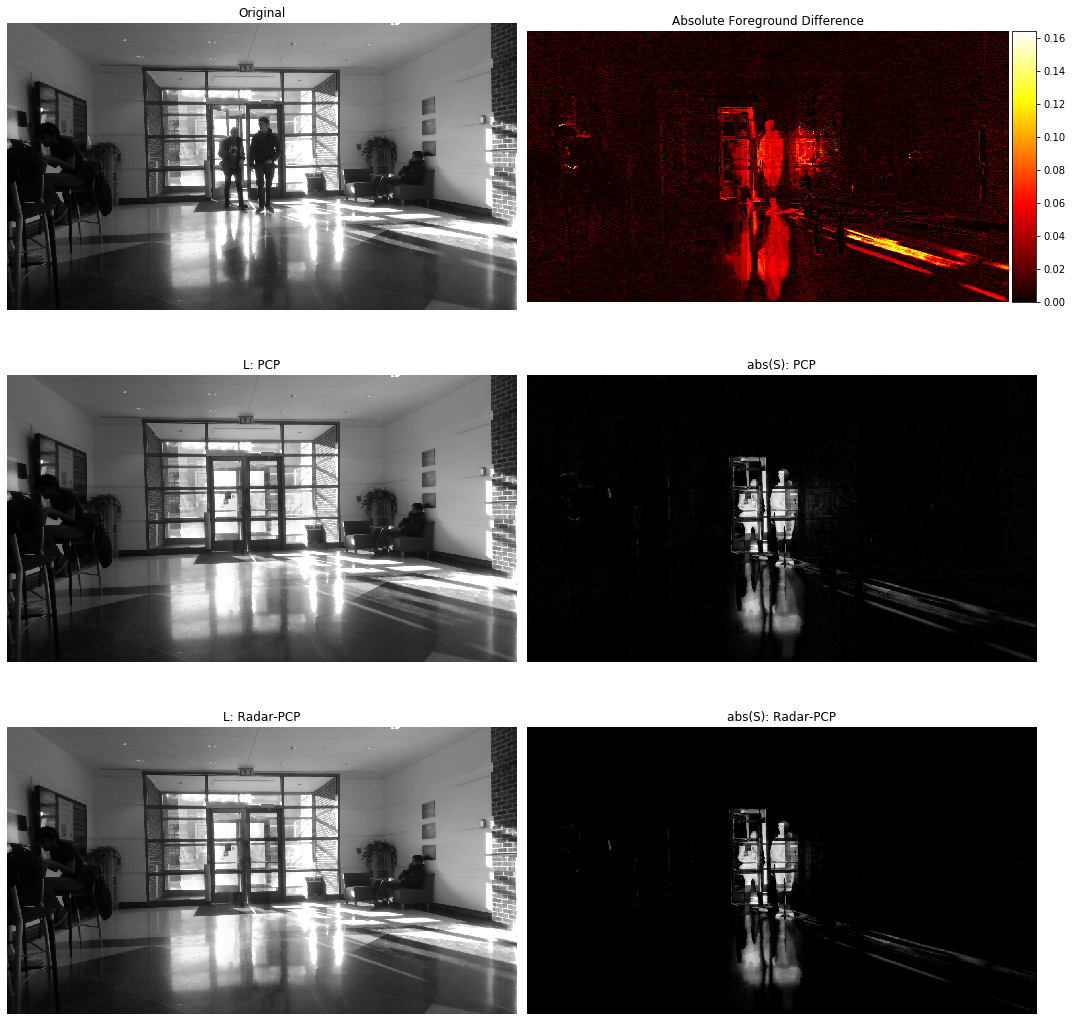

In [31]:
i = 0
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.title('Original')
plt.imshow(images[i], 'gray')
plt.axis('off')
plt.subplot(322)
ax = plt.gca()
plt.title('Absolute Foreground Difference')
im = ax.imshow(abs(S_radar_2[:, i]-S_pcp[:, i]).reshape(images.shape[1], images.shape[2]), 'hot')
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.subplot(323)
plt.title('L: PCP')
plt.imshow(L_pcp[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(324)
plt.title('abs(S): PCP')
plt.imshow(abs(S_pcp[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')
plt.subplot(325)
plt.title('L: Radar-PCP')
plt.imshow(L_radar_2[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(326)
plt.title('abs(S): Radar-PCP')
plt.imshow(abs(S_radar_2[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')


plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.savefig('b2_f1_frame0_it400.png')

In [16]:
np.save('normal_L.npy',L_pcp)
np.save('normal_S.npy',S_pcp)
np.save('radar_8_L.npy',L_radar_8)
np.save('radar_8_S.npy',S_radar_8)
np.save('radar_2_L.npy',L_radar_2)
np.save('radar_2_S.npy',S_radar_2)

In [32]:
L_pcp, S_pcp, _ = pcp(D, verbose=True, maxiter=50)

mu = 0.6283823935092239
Iteration 0: error=1.978e-03, rank=50, nnz=4304262, time=2.009e+00
Iteration 1: error=1.824e-04, rank=50, nnz=5170610, time=2.013e+00
Iteration 2: error=1.155e-04, rank=50, nnz=5735538, time=1.843e+00
Iteration 3: error=1.044e-04, rank=50, nnz=6253084, time=1.871e+00
Iteration 4: error=1.007e-04, rank=50, nnz=6757052, time=2.028e+00
Iteration 5: error=9.795e-05, rank=50, nnz=7246970, time=1.774e+00
Iteration 6: error=9.546e-05, rank=50, nnz=7719852, time=1.710e+00
Iteration 7: error=9.300e-05, rank=50, nnz=8174988, time=1.704e+00
Iteration 8: error=9.064e-05, rank=50, nnz=8611455, time=1.874e+00
Iteration 9: error=8.828e-05, rank=50, nnz=9029712, time=1.836e+00
Iteration 10: error=8.595e-05, rank=50, nnz=9430873, time=1.860e+00
Iteration 11: error=8.362e-05, rank=50, nnz=9812863, time=1.735e+00
Iteration 12: error=8.147e-05, rank=50, nnz=10178320, time=1.746e+00
Iteration 13: error=7.979e-05, rank=50, nnz=10527935, time=1.705e+00
Iteration 14: error=7.828e-05, r

Iteration 49: error=8.237e-05, rank=27, nnz=17303877, time=2.909e+00


In [33]:
gamma_b = 1
gamma_f = .8
M_F = build_M_F(images.shape, bounds, gamma_b, gamma_f)
L_radar_8, S_radar_8, _ = radar_pcp(D, M_F, verbose=True, maxiter=50)

mu = 0.6283823935092239
Iteration 0: error=1.936e-03, rank=50, nnz=4434680, time=1.824e+00
Iteration 1: error=1.823e-04, rank=50, nnz=5302751, time=1.777e+00
Iteration 2: error=1.155e-04, rank=50, nnz=5868856, time=1.720e+00
Iteration 3: error=1.045e-04, rank=50, nnz=6388119, time=1.758e+00
Iteration 4: error=1.007e-04, rank=50, nnz=6893758, time=1.850e+00
Iteration 5: error=9.804e-05, rank=50, nnz=7385408, time=2.063e+00
Iteration 6: error=9.557e-05, rank=50, nnz=7860110, time=1.702e+00
Iteration 7: error=9.315e-05, rank=50, nnz=8317612, time=1.703e+00
Iteration 8: error=9.084e-05, rank=50, nnz=8756456, time=1.711e+00
Iteration 9: error=8.853e-05, rank=50, nnz=9177522, time=1.702e+00
Iteration 10: error=8.626e-05, rank=50, nnz=9582210, time=1.707e+00
Iteration 11: error=8.402e-05, rank=50, nnz=9968361, time=1.903e+00
Iteration 12: error=8.197e-05, rank=50, nnz=10339067, time=1.795e+00
Iteration 13: error=8.040e-05, rank=50, nnz=10693454, time=1.860e+00
Iteration 14: error=7.901e-05, r

Iteration 49: error=8.211e-05, rank=27, nnz=18040487, time=2.878e+00


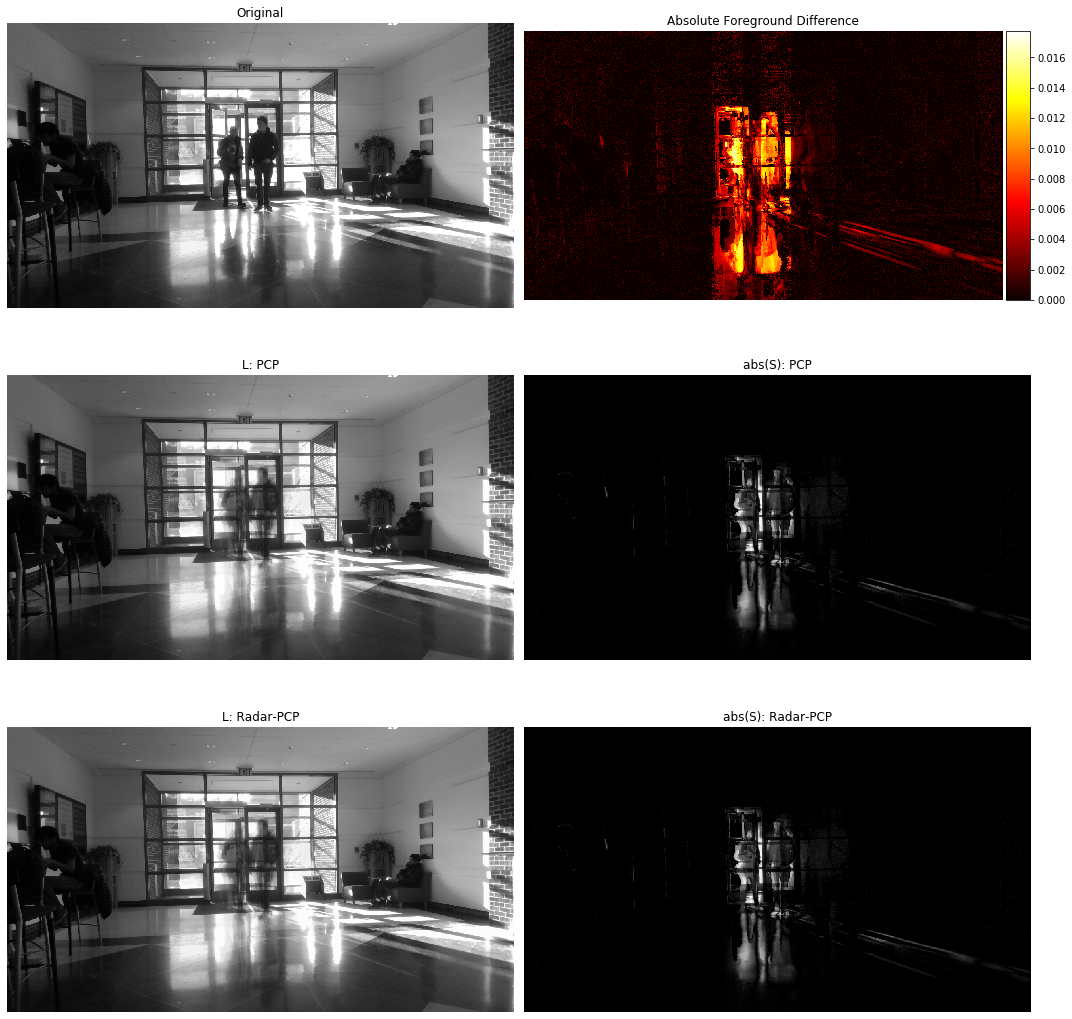

In [35]:
i = 0
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.title('Original')
plt.imshow(images[i], 'gray')
plt.axis('off')
plt.subplot(322)
ax = plt.gca()
plt.title('Absolute Foreground Difference')
im = ax.imshow(abs(S_radar_8[:, i]-S_pcp[:, i]).reshape(images.shape[1], images.shape[2]), 'hot')
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.subplot(323)
plt.title('L: PCP')
plt.imshow(L_pcp[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(324)
plt.title('abs(S): PCP')
plt.imshow(abs(S_pcp[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')
plt.subplot(325)
plt.title('L: Radar-PCP')
plt.imshow(L_radar_8[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(326)
plt.title('abs(S): Radar-PCP')
plt.imshow(abs(S_radar_8[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')


plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.savefig('b1_fp8_frame0_it50.png')

In [34]:
gamma_b = 2
gamma_f = 1
M_F = build_M_F(images.shape, bounds, gamma_b, gamma_f)
L_radar_2, S_radar_2, _ = radar_pcp(D, M_F, verbose=True, maxiter=50)

mu = 0.6283823935092239
Iteration 0: error=2.433e-03, rank=50, nnz=1279713, time=1.904e+00
Iteration 1: error=1.565e-04, rank=50, nnz=1414507, time=1.906e+00
Iteration 2: error=7.892e-05, rank=50, nnz=1485297, time=1.906e+00
Iteration 3: error=6.538e-05, rank=50, nnz=1546083, time=3.657e+00
Iteration 4: error=5.863e-05, rank=50, nnz=1601150, time=1.936e+00
Iteration 5: error=5.343e-05, rank=50, nnz=1651692, time=1.720e+00
Iteration 6: error=4.895e-05, rank=50, nnz=1697706, time=1.720e+00
Iteration 7: error=4.530e-05, rank=50, nnz=1739932, time=1.724e+00
Iteration 8: error=4.193e-05, rank=50, nnz=1778218, time=1.721e+00
Iteration 9: error=3.914e-05, rank=50, nnz=1813428, time=1.783e+00
Iteration 10: error=3.701e-05, rank=50, nnz=1846000, time=1.883e+00
Iteration 11: error=3.518e-05, rank=50, nnz=1876484, time=1.856e+00
Iteration 12: error=3.427e-05, rank=50, nnz=1904905, time=1.995e+00
Iteration 13: error=3.407e-05, rank=50, nnz=1931594, time=1.985e+00
Iteration 14: error=3.399e-05, ran

Iteration 49: error=3.034e-05, rank=50, nnz=2711070, time=1.805e+00


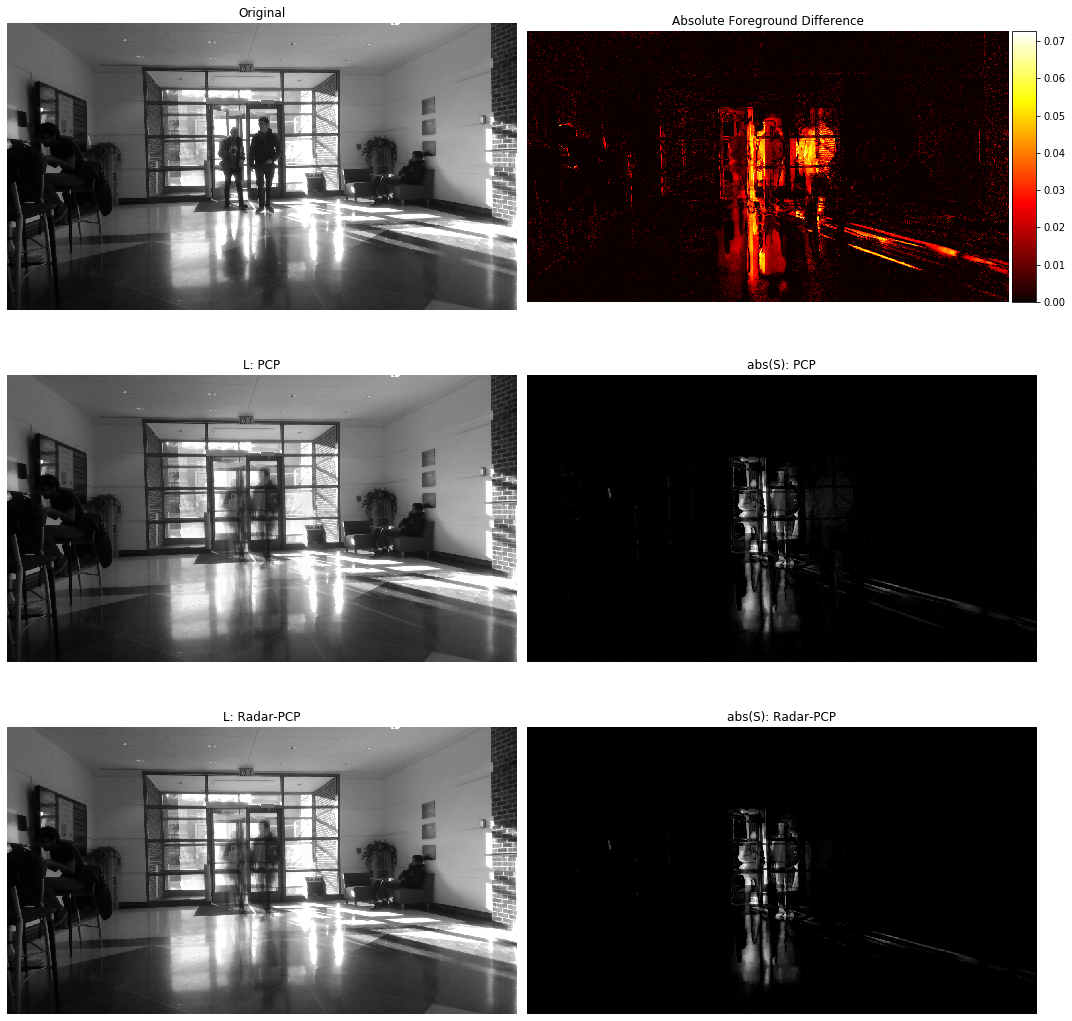

In [36]:
i = 0
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.title('Original')
plt.imshow(images[i], 'gray')
plt.axis('off')
plt.subplot(322)
ax = plt.gca()
plt.title('Absolute Foreground Difference')
im = ax.imshow(abs(S_radar_2[:, i]-S_pcp[:, i]).reshape(images.shape[1], images.shape[2]), 'hot')
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.subplot(323)
plt.title('L: PCP')
plt.imshow(L_pcp[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(324)
plt.title('abs(S): PCP')
plt.imshow(abs(S_pcp[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')
plt.subplot(325)
plt.title('L: Radar-PCP')
plt.imshow(L_radar_2[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(326)
plt.title('abs(S): Radar-PCP')
plt.imshow(abs(S_radar_2[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')


plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.savefig('b2_f1_frame0_it50.png')